In [225]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
from subprocess import call
from pathlib import Path
import pandas as pd

import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.utils import resample

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.metrics import matthews_corrcoef, f1_score, accuracy_score

hotenc = OneHotEncoder()
stdSca = StandardScaler()
minmax = MinMaxScaler()

In [134]:
dataset = "data/wdbc.data" 
if not Path(dataset).exists():
    call(["wget", "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data", "-O","./data/wdbc.data"])

In [247]:
df = pd.read_csv(dataset, names=["ID", "Diagnosis"] + [f"{idx:02d}" for idx in range(30)])
df['Diagnosis'] = (df['Diagnosis']=='M')*1

y = df.iloc[:, 1].values
X = df.iloc[:, 2:].values
df.head()



,ID,Diagnosis,00,01,02,03,04,05,06,07,...,20,21,22,23,24,25,26,27,28,29
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [260]:
results = {}
for clf in [KNeighborsClassifier(), SVC(), GradientBoostingClassifier()]:
    rskf = StratifiedKFold(n_splits=5, random_state=10, shuffle=True)
    results[f"{clf.__class__.__name__}"] = {'acc':[],'f1':[], 'mcc':[]}
    
    for train_index, test_index in rskf.split(X, y):

        X_train, X_test = X[train_index], X[test_index]
        X_train = stdSca.fit_transform(X_train)
        X_test  = stdSca.transform(X_test)
        y_train, y_test = y[train_index], y[test_index]
        
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        acc = accuracy_score(y_test, y_pred)
        f1  = f1_score(y_test, y_pred)
        mcc = matthews_corrcoef(y_test, y_pred)
        
        results[f"{clf.__class__.__name__}"]['acc'].append(acc)
        results[f"{clf.__class__.__name__}"]['f1'].append(f1)
        results[f"{clf.__class__.__name__}"]['mcc'].append(mcc)

        #print(f"{clf.__class__.__name__}, {acc:0.3f}, {f1:0.3f}, {mcc:0.3f}")
        

In [257]:
final_results = []
for clf_l in results:
    accs = np.array(results[clf_l]['acc'])
    f1s  = np.array(results[clf_l]['f1'])
    mccs = np.array(results[clf_l]['mcc'])
    
    facc = [clf_l, f"{accs.mean():0.3f} ± {accs.std():0.3f}", f"{f1s.mean():0.3f} ± {f1s.std():0.3f}", f"{mccs.mean():0.3f} ± {mccs.std():0.3f}"]
    final_results.append(np.array(facc))
    
df = pd.DataFrame(np.array(final_results), columns=["Name", "Accuracy", "F-Measure", "Matthews correlation coefficient"])


In [262]:
df

,Name,Accuracy,F-Measure,Matthews correlation coefficient
0,KNeighborsClassifier,0.960 ± 0.025,0.946 ± 0.034,0.914 ± 0.053
1,SVC,0.974 ± 0.016,0.964 ± 0.022,0.944 ± 0.034
2,GradientBoostingClassifier,0.956 ± 0.021,0.939 ± 0.031,0.907 ± 0.046


In [258]:
df.to_csv("results_up2.csv")

In [263]:
from sklearn import tree
names = (["mean radius ", "mean texture ", "mean perimeter ", "mean area ", "mean smoothness ", "mean compactness ", "mean concavity ", "mean concave points ", "mean symmetry ", "mean fractal dimension",
          "std radius ", "std texture ", "std perimeter ", "std area ", "std smoothness ", "std compactness ", "std concavity ", "std concave points ", "std symmetry ", "std fractal dimension",
          "largest radius ", "largest texture ", "largest perimeter ", "largest area ", "largest smoothness ", "largest compactness ", "largest concavity ", "largest concave points ", "largest symmetry ", "largest fractal dimension"])

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [304]:
importance

array([0.        , 0.03120753, 0.        , 0.        , 0.        ,
       0.00563858, 0.        , 0.00877112, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00787656, 0.00100384,
       0.03873296, 0.        , 0.        , 0.007316  , 0.        ,
       0.69559352, 0.05735376, 0.        , 0.0110859 , 0.01440488,
       0.00563858, 0.0082799 , 0.10709688, 0.        , 0.        ])

In [312]:
for i,v in enumerate(importance):
    if v > 0:
        print(f'Feature: {i} - {names[i]}, Score: {v:0.5f}')

Feature: 1 - mean texture , Score: 0.03121
Feature: 5 - mean compactness , Score: 0.00564
Feature: 7 - mean concave points , Score: 0.00877
Feature: 13 - std area , Score: 0.00788
Feature: 14 - std smoothness , Score: 0.00100
Feature: 15 - std compactness , Score: 0.03873
Feature: 18 - std symmetry , Score: 0.00732
Feature: 20 - largest radius , Score: 0.69559
Feature: 21 - largest texture , Score: 0.05735
Feature: 23 - largest area , Score: 0.01109
Feature: 24 - largest smoothness , Score: 0.01440
Feature: 25 - largest compactness , Score: 0.00564
Feature: 26 - largest concavity , Score: 0.00828
Feature: 27 - largest concave points , Score: 0.10710


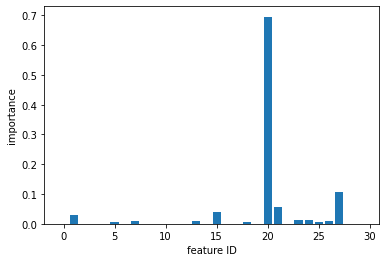

In [297]:
importance = clf.feature_importances_

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.ylabel("importance")
plt.xlabel("feature ID")
plt.show();